In [6]:
import pandas as pd
from dateutil.parser import parser
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates= ['date'], index_col= ['date'])

Decomposing trend and seasonality

In [14]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

<AxesSubplot:xlabel='date', ylabel='residual'>

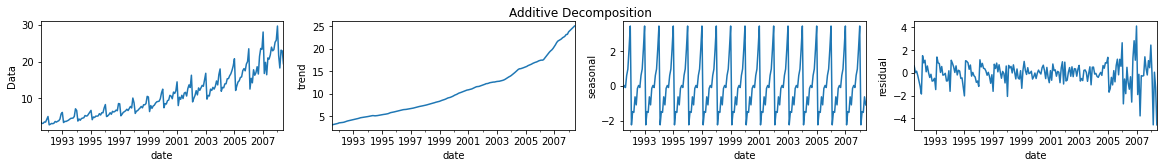

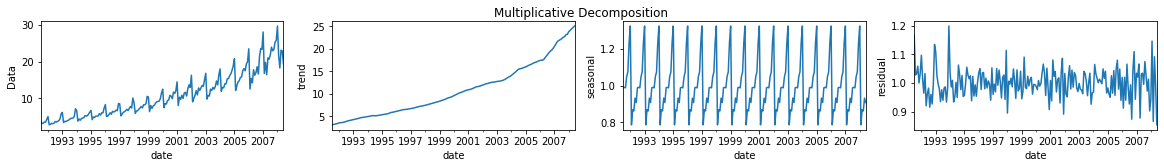

In [36]:
# Plotting additive decomposition
fig, axes=plt.subplots(1, 4, figsize= (20, 2))
plt.suptitle('Additive Decomposition')
data['value'].plot(ylabel= 'Data', ax= axes[0])
result_add.trend.plot(ylabel= 'trend', ax= axes[1])
result_add.seasonal.plot(ylabel= 'seasonal', ax= axes[2])
result_add.resid.plot(ylabel= 'residual', ax= axes[3])

#Plotting multiplicative decomposition
fig, axes=plt.subplots(1, 4, figsize= (20, 2))
plt.suptitle('Multiplicative Decomposition')
data['value'].plot(ylabel= 'Data', ax= axes[0])
result_mul.trend.plot(ylabel= 'trend', ax= axes[1])
result_mul.seasonal.plot(ylabel= 'seasonal', ax= axes[2])
result_mul.resid.plot(ylabel= 'residual', ax= axes[3])

The residual of the additive model is showing some pattern. This means some information is still there therefore Multiplicative model is more appropriate for this particular time series

In [37]:
from statsmodels.tsa.stattools import adfuller, kpss

C:\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


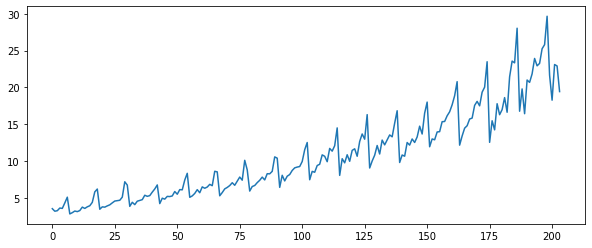

In [45]:
# ADF Test
data_adf = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
plt.figure(figsize= (10, 4))
plt.plot(data_adf.value)
result_adf= adfuller(data.value.values, autolag= 'AIC')
result_kpss= kpss(data.value.values, regression= 'c')

In [46]:
print(f'ADF Test result {result_adf[0]}')
print(f'ADF Test P value {result_adf[1]}')
print(f'KPSS Test result {result_kpss[0]}')
print(f'KPSS Test P value {result_kpss[1]}')

ADF Test result 3.145185689306747
ADF Test P value 1.0
KPSS Test result 2.0131256386303322
KPSS Test P value 0.01


Conclusion from the test:<br>
1. The series is not stationary according to ADF Test
2. The series is not trend stationary according to KPSS Test

In [47]:
diff_adf= data_adf.diff().dropna()


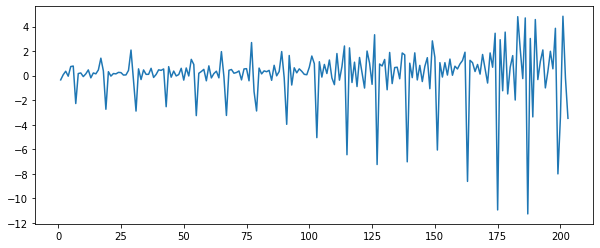

In [53]:
plt.figure(figsize= (10, 4))
plt.plot(diff_adf.value)

In [49]:
result_adf= adfuller(diff_adf.value.values, autolag= 'AIC')
result_kpss= kpss(diff_adf.value.values, regression= 'c')

C:\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [50]:
print(f'ADF Test result {result_adf[0]}')
print(f'ADF Test P value {result_adf[1]}')
print(f'KPSS Test result {result_kpss[0]}')
print(f'KPSS Test P value {result_kpss[1]}')

ADF Test result -2.495172147449701
ADF Test P value 0.11665341686469721
KPSS Test result 0.13410609625273154
KPSS Test P value 0.1


Conclusion from the test:<br>
1. The series is still not stationary according to ADF Test and also seasonal pattern is visible.
2. Trend statioanrity achieved

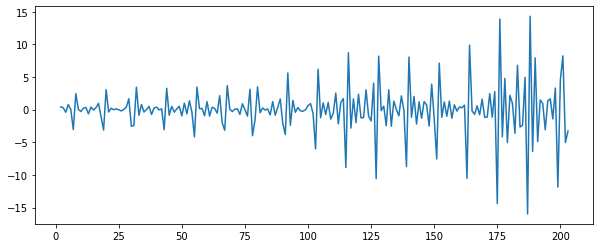

In [56]:
sec_diff_adf= diff_adf.diff().dropna()
plt.figure(figsize= (10, 4))
plt.plot(sec_diff_adf.value)

In [57]:
result_adf= adfuller(sec_diff_adf.value.values, autolag= 'AIC')
result_kpss= kpss(sec_diff_adf.value.values, regression= 'c')

C:\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [58]:
print(f'ADF Test result {result_adf[0]}')
print(f'ADF Test P value {result_adf[1]}')
print(f'KPSS Test result {result_kpss[0]}')
print(f'KPSS Test P value {result_kpss[1]}')

ADF Test result -10.292304706517307
ADF Test P value 3.543916358529597e-18
KPSS Test result 0.16269009165648923
KPSS Test P value 0.1


Now we can conclude that the second difference of the series is staionary

ACF Vs PACF

In [66]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

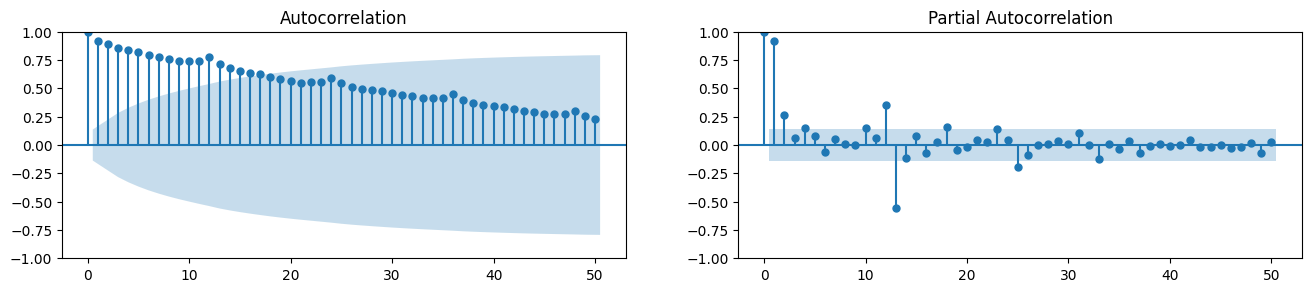

In [68]:
fig, axes= plt.subplots(1,2, figsize= (16, 3), dpi= 100)
plot_acf(df.value, lags= 50, ax= axes[0]);
plot_pacf(df.value, lags= 50, ax= axes[1], method= 'ywm');

Lag plots

In [69]:
from pandas.plotting import lag_plot

In [70]:
df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')


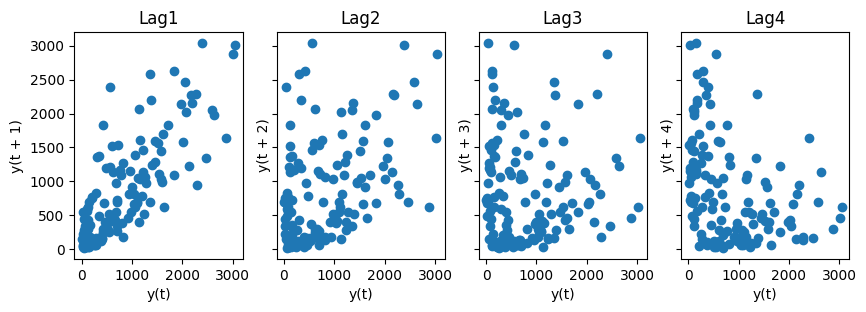

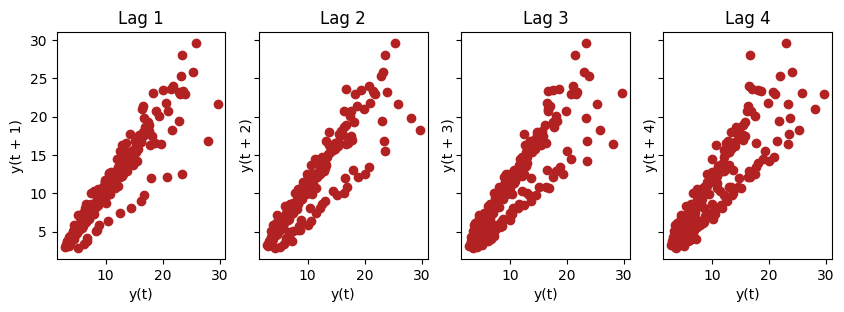

In [71]:
fig, axes= plt.subplots(1, 4, figsize= (10, 3), sharex= True, sharey= True, dpi= 100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df1.value, lag= i+ 1, ax=ax)
    ax.set_title('Lag'+ str(i+ 1))

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df2.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

Conclusion<br>
Lag plot for df1 has no particular pattern. It seems random hence we conclude that the series is less correlated but df2 clearly showing some pattern which makes the series highly correlated. This can be seen from the following time plot of the series. 

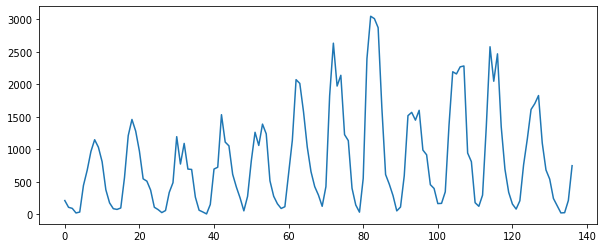

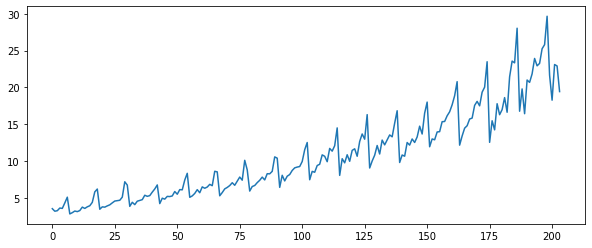

In [74]:
plt.figure(figsize= (10, 4))
plt.plot(df1.value)
plt.figure(figsize= (10, 4))
plt.plot(df2.value)

How to smoothen a time series?<br>
1. Take a moving average
2. Do a LOESS smoothing(Localized Regression)
3. Do a LOWESS smoothing(Locally Weighted Regression)

In [92]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [93]:
df_org= pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates= ['date'], index_col= 'date')

#1. Moving Average
df_ma= df_org.value.rolling(3).mean() # Take mean of last twoentrie for time t

#2. Losses Smoothing(5% and 15%)
df_loess_5= pd.DataFrame(lowess(df_org.value, np.arange(len(df_org.value)), frac= 0.05)[:, 1], index= df_org.index, columns= ['value'])
df_loess_15= pd.DataFrame(lowess(df_org.value, np.arange(len(df_org.value)), frac= 0.15)[:,1], index= df_org.index, columns= ['value'])

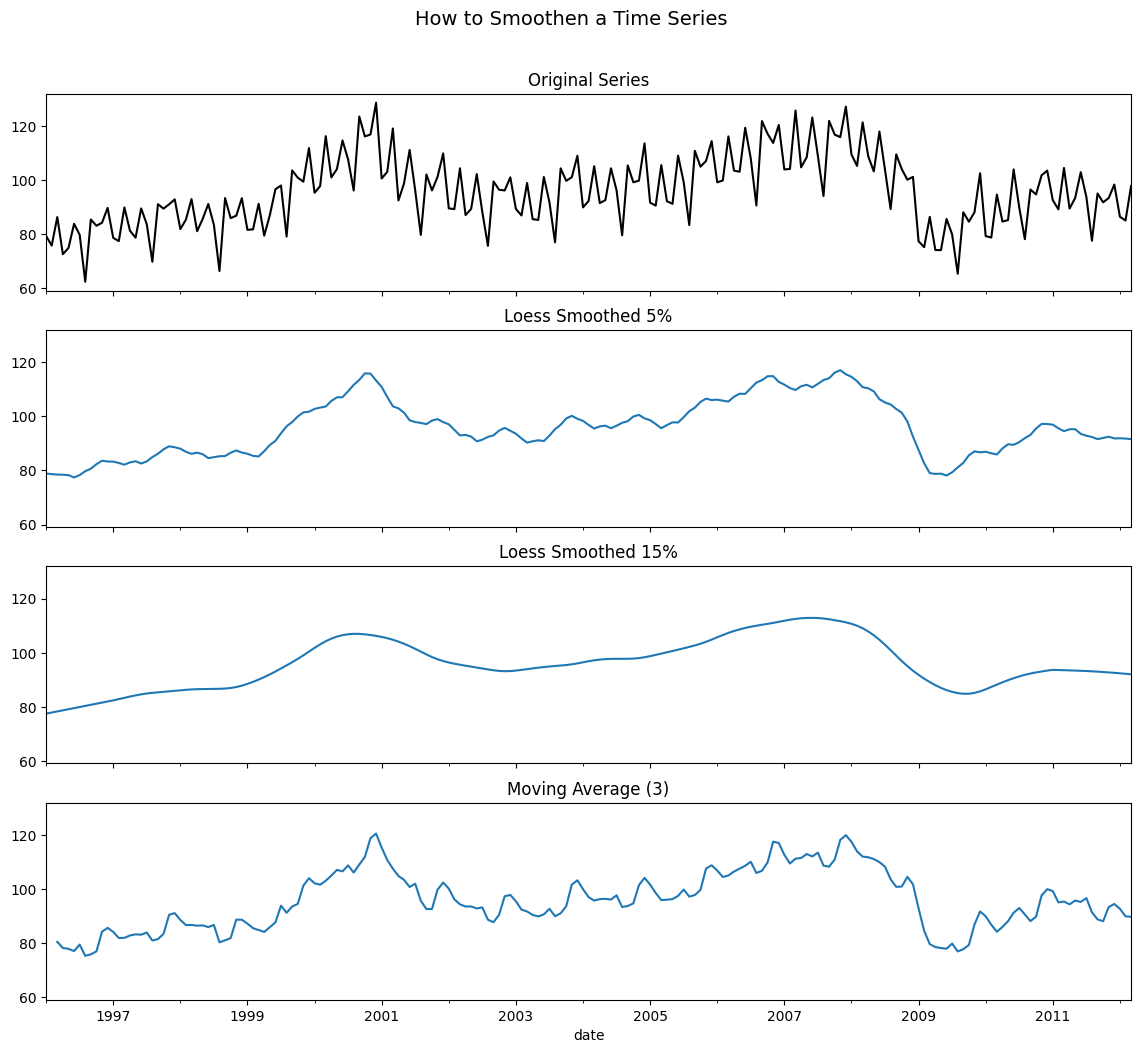

In [95]:
fig, axes= plt.subplots(4, 1, figsize= (14, 12), sharex= True, sharey= True, dpi= 100)
df_org['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()